# Steve Jigy Antony Task 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
matplotlib.rcParams['font.size']=17
matplotlib.rcParams['figure.figsize']=(12,6)

In [2]:
from sklearn import datasets
iris=datasets.load_iris()
orig_df=pd.DataFrame(iris.data,columns=iris.feature_names)
orig_df['cluster']=iris.target

## Original dataframe with target variable in cluster column

In [3]:
orig_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Dataframe with sepal dimensions

In [4]:
df_sepal=pd.DataFrame({'sepal_x':iris.data[:,0],'sepal_y':iris.data[:,1],'cluster':iris.target})
df_sepal.head(3)

,sepal_x,sepal_y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0


## Dataframe with petal dimensions

In [5]:
df_petal=pd.DataFrame({'petal_x':iris.data[:,2],'petal_y':iris.data[:,3],'cluster':iris.target})
df_petal.head(3)

,petal_x,petal_y,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0


## Calculating centroids

In [6]:
centroids_sepal={}
centroids_petal={}

In [7]:
def centroids_calc(df):
    m={}
    for i in range(3):
        lst=[]
        lst.append(df[df['cluster']==i][df.columns[0]].mean())
        lst.append(df[df['cluster']==i][df.columns[1]].mean())
        m[i]=lst
    return(m)

In [8]:
centroids_sepal=centroids_calc(df_sepal)
centroids_sepal

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

In [9]:
centroids_petal=centroids_calc(df_petal)
centroids_petal

{0: [1.4620000000000002, 0.2459999999999999],
 1: [4.26, 1.3259999999999998],
 2: [5.552, 2.026]}

## Calculating Within Cluster Sum of Squares (WCSS)

In [10]:
orig_df2=orig_df.drop(columns=['cluster'])
df_sepal2=df_sepal.drop(columns=['cluster'])
df_petal2=df_petal.drop(columns=['cluster'])

In [11]:
x=orig_df2.values
x1=df_sepal2.values
x2=df_petal2.values

### <font color='orangered'> WCSS using both petal and sepal dimensions

In [12]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,16):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

### <font color='orangered'> WCSS using sepal dimensions

In [13]:
wcss1=[]
for i in range(1,16):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(x1)
    wcss1.append(km.inertia_)

### <font color='orangered'> WCSS using both petal dimensions

In [14]:
wcss2=[]
for i in range(1,16):
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(x2)
    wcss2.append(km.inertia_)

# Elbow Method

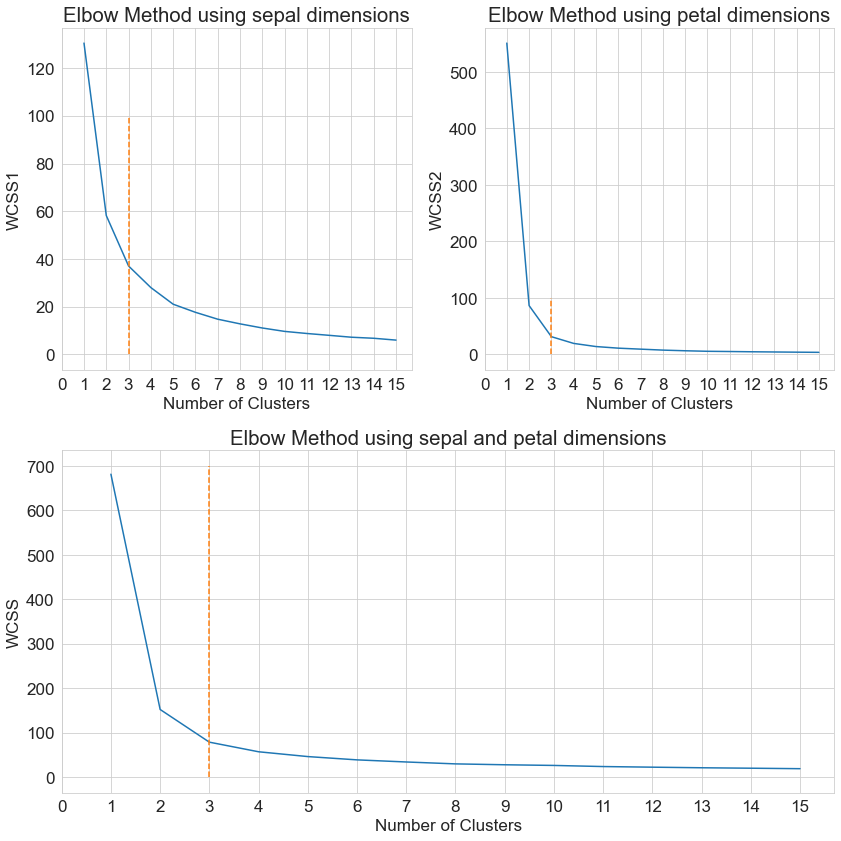

In [15]:
#fig,ax=plt.subplots(2,2);
matplotlib.rcParams['figure.figsize']=(12,12)
plt.subplot(2,2,1)
plt.plot(range(1,16),wcss1);
plt.plot((3,3),(0,100),'--');
plt.xticks(np.arange(0,16,1));
plt.title('Elbow Method using sepal dimensions');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS1');


plt.subplot(2,2,2)
plt.plot(range(1,16),wcss2);
plt.plot((3,3),(0,100),'--');
plt.xticks(np.arange(0,16,1));
plt.title('Elbow Method using petal dimensions');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS2');


plt.subplot(2,2,(3,4))
plt.plot(range(1,16),wcss);
plt.plot((3,3),(0,700),'--');
plt.xticks(np.arange(0,16,1));
plt.title('Elbow Method using sepal and petal dimensions');
plt.xlabel('Number of Clusters');
plt.ylabel('WCSS');
plt.tight_layout();

#### <font color='green'> *According to the elbow method, the elbow of the graph denotes the optimum number of clusters. In this case, the optimum number of clusters is 3.*

# Representing clusters using scatterplot

In [16]:
km=KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_km1=km.fit_predict(x1)
y_km2=km.fit_predict(x2)
y_km=km.fit_predict(x)

In [17]:
colmap={0:'pink',1:'lime',2:'aqua'}

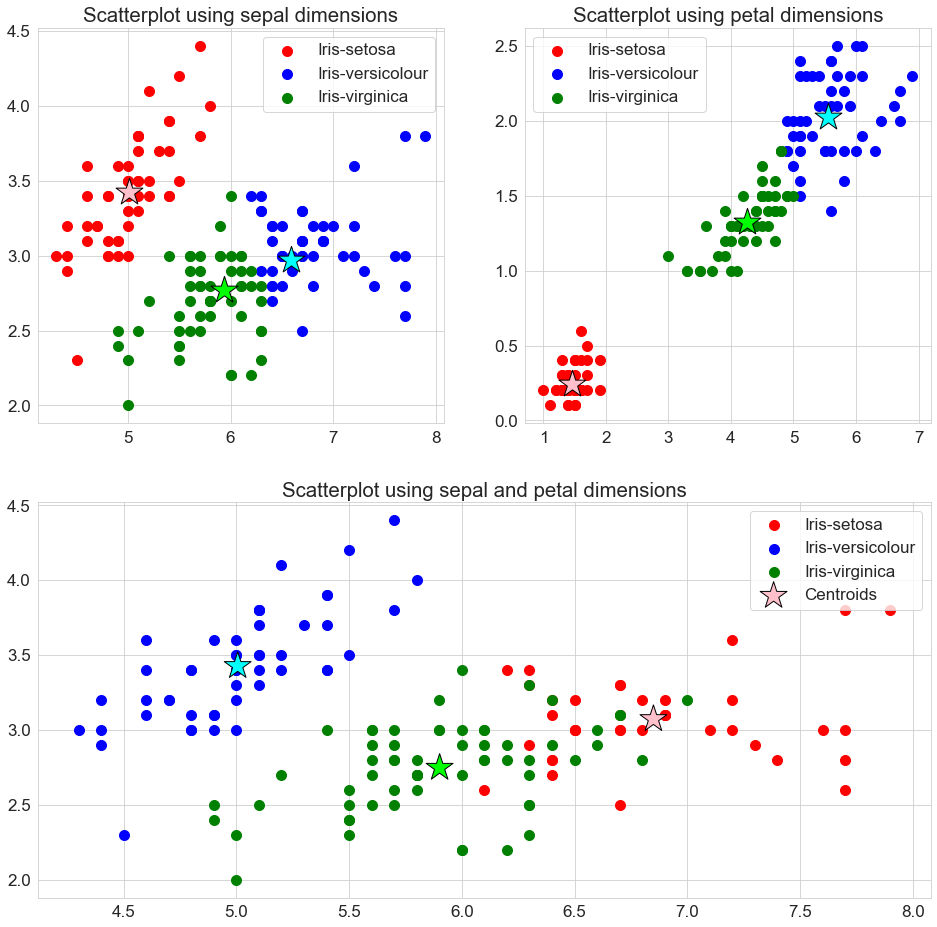

In [18]:
matplotlib.rcParams['figure.figsize']=(16,16)
plt.subplot(2,2,1)
plt.title('Scatterplot using sepal dimensions')
plt.scatter(x1[y_km1 == 0, 0], x1[y_km1 == 0, 1],s = 100, c = 'red', label = 'Iris-setosa');
plt.scatter(x1[y_km1 == 1, 0], x1[y_km1 == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour');
plt.scatter(x1[y_km1 == 2, 0], x1[y_km1 == 2, 1],s = 100, c = 'green', label = 'Iris-virginica');
for i in range(3):
    plt.scatter(centroids_sepal[i][0],centroids_sepal[i][1],c=colmap[i],edgecolor='black',s=800,marker='*')
plt.legend();


plt.subplot(2,2,2)
plt.title('Scatterplot using petal dimensions')
plt.scatter(x2[y_km2 == 0, 0], x2[y_km2 == 0, 1],s = 100, c = 'red', label = 'Iris-setosa');
plt.scatter(x2[y_km2 == 1, 0], x2[y_km2 == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour');
plt.scatter(x2[y_km2 == 2, 0], x2[y_km2 == 2, 1],s = 100, c = 'green', label = 'Iris-virginica');

for i in range(3):
    plt.scatter(centroids_petal[i][0],centroids_petal[i][1],c=colmap[i],edgecolor='black',s=800,marker='*')
plt.legend();

plt.subplot(2,2,(3,4))
plt.title('Scatterplot using sepal and petal dimensions')
plt.scatter(x[y_km == 0, 0], x[y_km == 0, 1],s = 100, c = 'red', label = 'Iris-setosa');
plt.scatter(x[y_km == 1, 0], x[y_km == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour');
plt.scatter(x[y_km == 2, 0], x[y_km == 2, 1],s = 100, c = 'green', label = 'Iris-virginica');
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1],s = 800, c = ['pink','aqua','lime'], label = 'Centroids',marker='*',edgecolor='black');
plt.legend();

# <font color='orangered'> Thank You!